In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
bank_data=pd.read_csv('bank1.csv')

In [72]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [74]:
bank_data.info()
bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [76]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [78]:
bank_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [80]:
s=[]
for col in bank_data.columns:
    if bank_data[col].dtype==object:
        s.append(col)
    

In [82]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in s:
    bank_data[col]=LE.fit_transform(bank_data[col])

In [84]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [86]:
bank_data['job']=LE.fit_transform(bank_data['job'])

In [88]:
bank_data['education']=LE.fit_transform(bank_data['education'])
bank_data['default']=LE.fit_transform(bank_data['default'])
bank_data['housing']=LE.fit_transform(bank_data['housing'])
bank_data['loan']=LE.fit_transform(bank_data['loan'])
bank_data['contact']=LE.fit_transform(bank_data['contact'])
bank_data['month']=LE.fit_transform(bank_data['month'])
bank_data['poutcome']=LE.fit_transform(bank_data['poutcome'])

In [98]:
bank_data['marital']=LE.fit_transform(bank_data['marital'])

In [100]:
df= bank_data

In [102]:
X=bank_data.drop('y',axis=1)
y=bank_data["y"]

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.25, random_state=40)

In [134]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
DT.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [136]:
y_pred =  DT.predict(X_test)

In [138]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy_score(y_test,y_pred)

0.8779840848806366

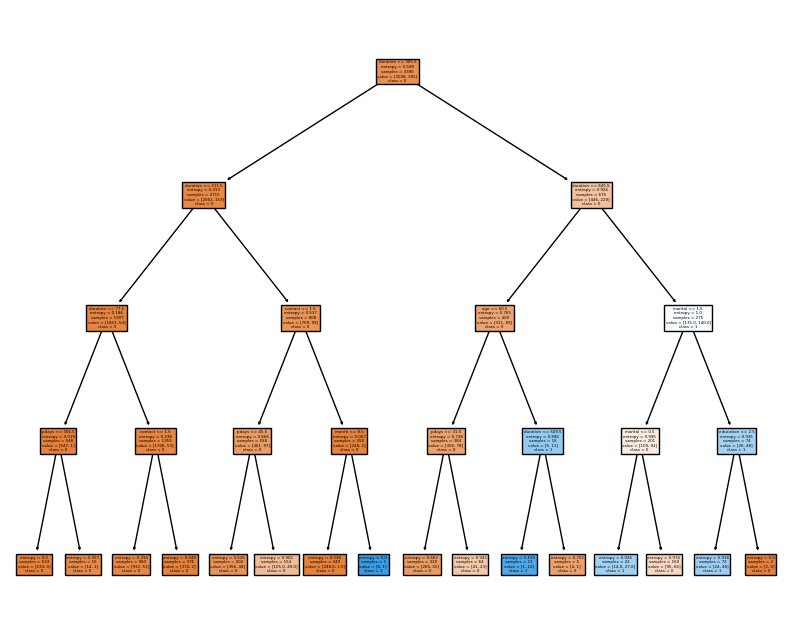

In [152]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10, 8))
tree.plot_tree(DT, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.show()